In [6]:
# import packages
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.express as px
import numpy as np
import pandas as pd

In [7]:
import pandas as pd 
import numpy as np
import openai
import os
import langchain
import faiss # defunct needs to be removed
from langchain.vectorstores import FAISS # defunct needs to be removed
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
import pickle
from langchain.chat_models import ChatOpenAI
#from langchain.chains import VectorDBQAWithSourcesChain
from langchain.chains import RetrievalQAWithSourcesChain
from langchain import OpenAI
from langchain.vectorstores import Chroma
import time

import matplotlib

import dotenv
from dotenv import load_dotenv
load_dotenv()
# load the .env file
dotenv.load_dotenv()
# add the api key to the environment
openai.api_key = os.environ["OPENAI_API_KEY"]


In [8]:
#import data 
complete_emebed_party = pd.read_csv('../processed_data/complete_emebed_party.csv')

In [9]:
complete_emebed_party.columns

Index(['schoolname', 'mission_statement', 'mission_statement_shorten',
       'ada_embedding', 'countydescription', 'political_afil',
       'extract_name_clean_list', 'principal/directoremail', 'website',
       'board_of_directors_link', 'link_domain_match', 'director_first_last',
       'cleaner_names', 'zipcode', 'political_affilation', 'postal_code',
       'latitude', 'longitude', 'count_dem', 'count_rep', 'count_una',
       'district_count_dem', 'district_count_rep', 'district_count_una',
       'charter_majority_party', 'district_majority_party'],
      dtype='object')

In [10]:
complete_emebed_party.head()

,schoolname,mission_statement,mission_statement_shorten,ada_embedding,countydescription,political_afil,extract_name_clean_list,principal/directoremail,website,board_of_directors_link,...,latitude,longitude,count_dem,count_rep,count_una,district_count_dem,district_count_rep,district_count_una,charter_majority_party,district_majority_party
0,North Carolina Cyber Academy,The mission of the school is to ensure that ea...,NaN,"[-0.022048141807317734, 0.012611066922545433, ...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",mhill@myncca.com,myncca.com,https://www.myncca.com/our-school-board,...,35.9112,-78.9178,5,2,0,6,0,1,Democrat,Democrat
1,NC Virtual Academy,The vision of the school is to be a rich schoo...,The mission statement of the school for studen...,"[0.0047307563945651054, 0.0009017903357744217,...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",kgomersall@ncvacademy.org,ncvacademy.org,https://ncva.k12.com/about-our-school/board-of...,...,35.9112,-78.9178,2,2,2,6,0,1,Tie,Democrat
2,Maureen Joy Charter School,The vision/mission of the school for students ...,The mission statement of the school for studen...,"[-0.006839691661298275, 0.003196117701008916, ...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",Dcannon@joycharter.org,joycharter.org,https://www.joycharter.org/board,...,35.9781,-78.8439,6,1,2,6,0,1,Democrat,Democrat
3,Durham Charter School,The vision of Durham Charter School is to prep...,The mission statement of Durham Charter School...,"[0.007524167187511921, 0.00907169096171856, -0...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",aquigley@durhamcharter.org,durhamcharter.org,https://www.durhamcharter.org/board-of-directors/,...,35.9967,-78.8966,2,4,4,6,0,1,Republican,Democrat
4,Community School of Digital & Visual Art,The mission of the school is to build students...,The mission statement of the school for studen...,"[-0.001325286808423698, 0.011081067845225334, ...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",OAdeniyi@communitydva.org,communitydva.org,https://www.communitydva.org/,...,36.0218,-78.9478,5,0,1,6,0,1,Democrat,Democrat


In [11]:
# Create a t-SNE model and transform the data
complete_emebed_party['ada_embedding'] = complete_emebed_party['ada_embedding'].apply(eval)
embeddings = np.stack(complete_emebed_party['ada_embedding'].values)  # convert embeddings to numpy array
school_names = complete_emebed_party['schoolname'].values
charter_pol_affiliation = complete_emebed_party['charter_majority_party'].values  # replace with actual column name
district_pol_affiliation = complete_emebed_party['district_majority_party'].values  # replace with actual column name
country_description = complete_emebed_party['countydescription'].values

# Apply t-SNE to the embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Convert the 2D embeddings to a DataFrame
df_2d = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
df_2d['schoolname'] = school_names
df_2d['charter_political_affiliation'] = charter_pol_affiliation
df_2d['district_political_affiliation'] = district_pol_affiliation
df_2d['countydescription'] = country_description

#define color scheme 
color_discrete_map = {'Democrat':'blue', 'Republican':'red', 'Tie': 'green'}

In [12]:
fig = px.scatter(df_2d, x='x', y='y',title='Sentence Embed with Charter Political Affiliation', color='charter_political_affiliation', color_discrete_map=color_discrete_map,hover_data=['schoolname', 'district_political_affiliation', 'countydescription'])
fig.show()

In [13]:
fig = px.scatter(df_2d, x='x', y='y',title='Sentence Embed with District Political Affiliation', color='district_political_affiliation',color_discrete_map=color_discrete_map, hover_data=['schoolname', 'charter_political_affiliation', 'countydescription'])
fig.show()

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans

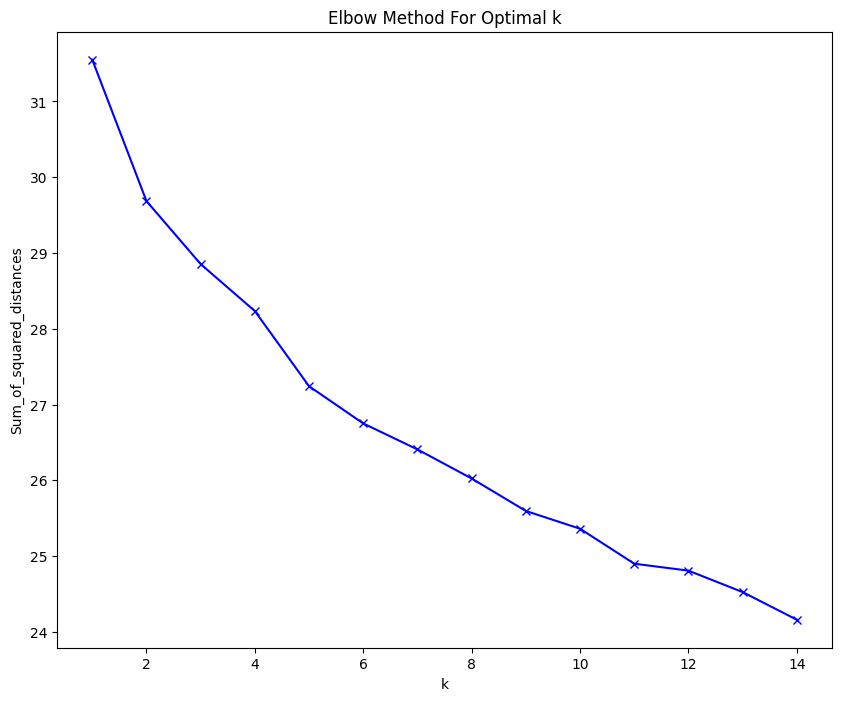

In [14]:
## elbow test the damn thing

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

matrix = np.vstack(complete_emebed_party.ada_embedding.values)

sse = [] # sum of squared distances
K = range(1, 15) # test up to 15 clusters, adjust as necessary

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(matrix)
    sse.append(kmeans.inertia_)

# plot
plt.figure(figsize=(10,8))
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show() # holy shit there is no elbow

In [15]:
import numpy as np
from sklearn.cluster import KMeans

matrix = np.vstack(complete_emebed_party.ada_embedding.values)
n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
complete_emebed_party['Cluster'] = kmeans.labels_

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\chris\AppData\Local\Temp\ipykernel_25232\2850246872.py:12: RuntimeWarning:

Mean of empty slice.

c:\Users\chris\.conda\envs\charter\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in divide

C:\Users\chris\AppData\Local\Temp\ipykernel_25232\2850246872.py:13: RuntimeWarning:

Mean of empty slice.



Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

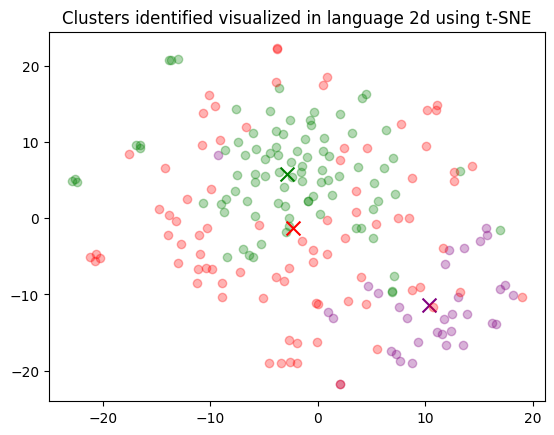

In [16]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate='auto')
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[complete_emebed_party.Cluster == category]
    ys = np.array(y)[complete_emebed_party.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [17]:
import plotly.express as px

# Assuming you've performed TSNE and have your DataFrame ready
df_vis = pd.DataFrame({
    'x': x,
    'y': y,
    'Cluster': complete_emebed_party.Cluster,
    'SchoolName': complete_emebed_party.schoolname,
    'DistrictPoliticalAffiliation': complete_emebed_party.district_majority_party,
    'CharterPoliticalAffiliation':complete_emebed_party.charter_majority_party  # Replace with your actual column
})

fig = px.scatter(df_vis, x='x', y='y', color='Cluster', hover_data=['SchoolName', 'DistrictPoliticalAffiliation','CharterPoliticalAffiliation'])

fig.show()

In [18]:
# First, count the occurrences of each political affiliation within each cluster
df_count = complete_emebed_party.groupby(['Cluster', 'district_majority_party']).size().reset_index(name='Counts')

# Then, create a bar chart
fig = px.bar(df_count, x='Cluster', y='Counts', color='district_majority_party', barmode='group', 
             labels={'Counts':'Number of Schools', 'Cluster':'Cluster ID'})

fig.show()

In [19]:
# First, count the occurrences of each political affiliation within each cluster
df_count = complete_emebed_party.groupby(['Cluster', 'charter_majority_party']).size().reset_index(name='Counts')

# Then, create a bar chart
fig = px.bar(df_count, x='Cluster', y='Counts', color='charter_majority_party', barmode='group', 
             labels={'Counts':'Number of Schools', 'Cluster':'Cluster ID'})

fig.show()

In [20]:
complete_emebed_party.mission_statement[complete_emebed_party.schoolname == 'Mountain Island Charter School']

46    Mountain Island Charter School offers a tradit...
Name: mission_statement, dtype: object

In [ ]:
# give me sample mission statement based on cluster
#list_content_cluster_0=list(complete_emebed_party.mission_statement[complete_emebed_party.Cluster == 0])

In [ ]:
#list_content_cluster_0

In [ ]:
#list_content_cluster_1=list(complete_emebed_party.mission_statement[complete_emebed_party.Cluster == 1])

In [ ]:
#list_content_cluster_1

In [ ]:
#list_content_cluster_2=list(complete_emebed_party.mission_statement[complete_emebed_party.Cluster == 2])

In [ ]:
#list_content_cluster_2

In [ ]:
# what if we more the first 7 tokens from the mission statement in cluster 1

In [ ]:
#complete_emebed_party['mission_statement_experiment']=complete_emebed_party.apply(lambda row: ' '.join(row['mission_statement'].split()[7:]) if row['Cluster'] == 1 else row['mission_statement'], axis=1)


In [ ]:
# def get_embedding(text, model="text-embedding-ada-002"):
#    text = text.replace("\n", " ")
#    time.sleep(5)
#    return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

# complete_emebed_party['ada_embedding_experiment'] = complete_emebed_party.mission_statement_experiment.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))

In [ ]:
# # Create a t-SNE model and transform the data
# #complete_emebed_party['ada_embedding'] = complete_emebed_party['ada_embedding'].apply(eval)
# embeddings = np.stack(complete_emebed_party['ada_embedding_experiment'].values)  # convert embeddings to numpy array
# school_names = complete_emebed_party['schoolname'].values
# charter_pol_affiliation = complete_emebed_party['charter_majority_party'].values  # replace with actual column name
# district_pol_affiliation = complete_emebed_party['district_majority_party'].values  # replace with actual column name
# country_description = complete_emebed_party['countydescription'].values

# # Apply t-SNE to the embeddings
# tsne = TSNE(n_components=2, random_state=42)
# embeddings_2d = tsne.fit_transform(embeddings)

# # Convert the 2D embeddings to a DataFrame
# df_2d = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
# df_2d['schoolname'] = school_names
# df_2d['charter_political_affiliation'] = charter_pol_affiliation
# df_2d['district_political_affiliation'] = district_pol_affiliation
# df_2d['countydescription'] = country_description

# #define color scheme 
# color_discrete_map = {'Democrat':'blue', 'Republican':'red', 'Tie': 'green'}

In [ ]:
# fig = px.scatter(df_2d, x='x', y='y',title='Sentence Embed with Charter Political Affiliation', color='charter_political_affiliation', color_discrete_map=color_discrete_map,hover_data=['schoolname', 'district_political_affiliation', 'countydescription'])
# fig.show()

In [ ]:
# fig = px.scatter(df_2d, x='x', y='y',title='Sentence Embed with District Political Affiliation', color='district_political_affiliation',color_discrete_map=color_discrete_map, hover_data=['schoolname', 'charter_political_affiliation', 'countydescription'])
# fig.show()

In [ ]:
# import numpy as np
# from sklearn.cluster import KMeans

# matrix = np.vstack(complete_emebed_party.ada_embedding_experiment.values)
# n_clusters = 3

# kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
# kmeans.fit(matrix)
# complete_emebed_party['Cluster_experiment'] = kmeans.labels_

In [ ]:
# tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate='auto')
# vis_dims2 = tsne.fit_transform(matrix)

# x = [x for x, y in vis_dims2]
# y = [y for x, y in vis_dims2]

# for category, color in enumerate(["purple", "green", "red", "blue"]):
#     xs = np.array(x)[complete_emebed_party.Cluster == category]
#     ys = np.array(y)[complete_emebed_party.Cluster == category]
#     plt.scatter(xs, ys, color=color, alpha=0.3)

#     avg_x = xs.mean()
#     avg_y = ys.mean()

#     plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
# plt.title("Clusters identified visualized in language 2d using t-SNE")

In [ ]:
# import plotly.express as px

# # Assuming you've performed TSNE and have your DataFrame ready
# df_vis = pd.DataFrame({
#     'x': x,
#     'y': y,
#     'Cluster': complete_emebed_party.Cluster_experiment,
#     'SchoolName': complete_emebed_party.schoolname,
#     'DistrictPoliticalAffiliation': complete_emebed_party.district_majority_party,
#     'CharterPoliticalAffiliation':complete_emebed_party.charter_majority_party  # Replace with your actual column
# })

# fig = px.scatter(df_vis, x='x', y='y', color='Cluster', hover_data=['SchoolName', 'DistrictPoliticalAffiliation','CharterPoliticalAffiliation'])

# fig.show()

In [ ]:
# list_content_cluster_1=list(complete_emebed_party.mission_statement_experiment[complete_emebed_party.Cluster_experiment == 1])
# list_content_cluster_1

In [ ]:
# list_content_cluster_2=list(complete_emebed_party.mission_statement_experiment[complete_emebed_party.Cluster_experiment == 2])
# list_content_cluster_2

In [ ]:
# list_content_cluster_0=list(complete_emebed_party.mission_statement_experiment[complete_emebed_party.Cluster_experiment == 0])
# list_content_cluster_0

In [ ]:
complete_emebed_party.to_csv('../processed_data/complete_with_experiment.csv' , index=False)

In [ ]:
## search revelancey for mission statements

In [33]:
from openai.embeddings_utils import get_embedding, cosine_similarity

def search_reviews(df, product_description, n=3, pprint=True):
   embedding = get_embedding(product_description, engine='text-embedding-ada-002')
   df['similarities'] = df.ada_embedding.apply(lambda x: cosine_similarity(x, embedding))
   res = df.sort_values('similarities', ascending=False).head(n)
   return df['similarities']

res = search_reviews(complete_emebed_party, 'empathy', n=3)

In [34]:
res

0      0.742250
1      0.746548
2      0.759960
3      0.738892
4      0.774138
         ...   
201    0.733603
202    0.747632
203    0.758059
204    0.761374
205    0.741718
Name: similarities, Length: 206, dtype: float64